## Observations and Insights 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_combined = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_data_combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = mouse_data_combined["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data_combined[mouse_data_combined.duplicated(subset=['Mouse ID','Timepoint'])]["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_combined.loc[mouse_data_combined["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data_combined[mouse_data_combined["Mouse ID"] != "g989"]

In [13]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = mouse_data_clean["Mouse ID"].nunique()
mouse_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

mean_mouse_data = mouse_data_clean.groupby("Drug Regimen")["Tumour Volume (mm3)"].mean()
med_mouse_data = mouse_data_clean.groupby("Drug Regimen")["Tumour Volume (mm3)"].median()
var_mouse_data = mouse_data_clean.groupby("Drug Regimen")["Tumour Volume (mm3)"].var()
std_mouse_data = mouse_data_clean.groupby("Drug Regimen")["Tumour Volume (mm3)"].std()
sem_mouse_data = mouse_data_clean.groupby("Drug Regimen")["Tumour Volume (mm3)"].sem()
summary_stats = pd.DataFrame([mean_mouse_data, med_mouse_data, var_mouse_data, std_mouse_data, sem_mouse_data])
summary_statistics = summary_stats.T
summary_statistics.columns = ["Mean of Tumour Volume (mm3)", "Median of Tumour Volume (mm3)", "Variance of Tumour Volume (mm3)", "Standard Deviation of Tumour Volume (mm3)", "SEM of Tumour Volume (mm3)"]
summary_statistics


,Mean of Tumour Volume (mm3),Median of Tumour Volume (mm3),Variance of Tumour Volume (mm3),Standard Deviation of Tumour Volume (mm3),SEM of Tumour Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

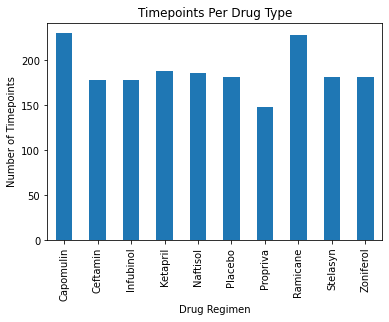

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug = mouse_data_clean.groupby("Drug Regimen")
count_chart = drug["Drug Regimen"].count()
count_chart.plot(kind="bar")
plt.title("Timepoints Per Drug Type")
plt.ylabel("Number of Timepoints")
plt.show()


In [60]:
drug_list = mouse_data_clean["Drug Regimen"].unique()
drug_list.sort()
y_axis = mouse_data_clean.groupby("Drug Regimen")["Timepoint"].count()


In [46]:
list = []
for entry in y_axis:
    print(entry)
    list.append(entry)
x_axis = np.arange(len(list))

230
178
178
188
186
181
148
228
181
182


Text(0, 0.5, 'Number of Timepoints')

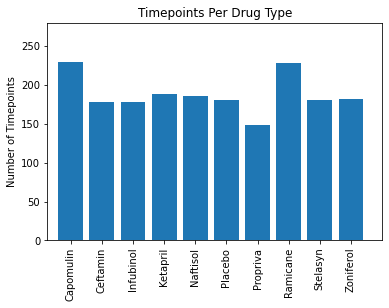

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

tick_locations = [value for value in x_axis]
plt.xticks(rotation=90)
plt.xticks(tick_locations, drug_list)
plt.ylim(0, max(y_axis)+50)
plt.bar(x_axis, list, align="center")
plt.xlim(-0.75, len(x_axis))
plt.title("Timepoints Per Drug Type")
plt.ylabel("Number of Timepoints")


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
